# Experiment 1

### Include the common code notebook

In [1]:
%run CommonCodeForExperiments.ipynb

In [6]:
aitia = App()

In [7]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [8]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [29]:
def get_clustered_dataframe(incoming_df, column_list,  n_clusters, sample_size):
    gmm = mixture.GaussianMixture(n_components=n_clusters
                                         ).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

In [10]:
pc = pycausal()
pc.start_vm()

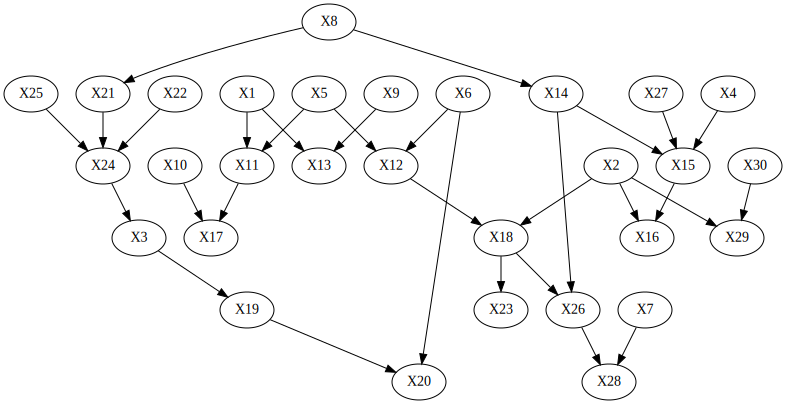

In [11]:
random_scm2 = aitia.data.random_scm2()
random_scm2.cgm.draw()

In [12]:
target_graph_str = str(random_scm2.cgm.draw())

In [30]:
df = random_scm2.sample(2000)
df

,X30,X27,X25,X22,X10,X9,X8,X21,X24,X3,...,X29,X18,X26,X28,X23,X16,X1,X13,X11,X17
0,-1.242028,0.693906,0.832934,0.349233,-1.230777,0.218409,0.494571,-1.218914,-0.802621,0.565666,...,0.581404,0.677269,0.101531,-0.632910,0.441329,0.842812,-0.215517,-0.600705,-0.368208,-1.948200
1,-0.030287,-0.319656,-0.598494,-1.723250,-0.012152,-0.505126,-0.474381,-0.504391,-2.751853,-2.528229,...,-0.026641,-1.811976,-0.020397,1.019642,1.111559,-0.462616,0.892170,0.373736,0.497381,-0.624650
2,0.869608,0.030821,-0.512611,-0.692323,1.248387,-0.532569,1.548505,1.139047,1.693350,1.342048,...,1.364745,0.834779,-1.287079,-0.995002,1.223061,-0.207423,-1.811675,-0.871464,-3.390742,-3.084800
3,0.449294,-0.094637,-0.023545,-0.579282,-0.097293,-0.220167,-0.893173,0.540346,-0.952940,-0.849062,...,-0.173846,-0.504227,-0.777899,-0.885913,0.547716,-0.581963,-1.008255,-2.327714,-1.237471,0.128277
4,2.553824,0.128390,-0.781411,0.397850,1.168028,0.013414,-0.765150,1.923010,2.255219,1.039181,...,1.184491,0.515830,0.860337,0.166639,0.194802,-1.918517,1.104101,-0.163981,0.760838,1.701087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.727554,1.239098,0.976005,2.429068,-0.582084,-0.668347,-0.627063,0.351266,3.274700,2.959629,...,-0.333898,1.301801,1.945934,1.084251,0.437597,1.402140,1.197021,0.776375,1.294497,0.911890
1996,-0.671629,-1.283038,1.576792,0.383161,-0.064441,0.260510,0.532512,0.703502,1.071092,1.212072,...,0.704804,1.316010,0.950553,1.597172,0.544338,-0.771776,0.178957,-0.587281,-1.590447,-1.332813
1997,0.313726,0.481385,-0.023567,-0.149469,-1.047119,0.389275,-0.278173,1.956320,0.936525,1.349864,...,-0.723236,-3.536531,-3.119371,-2.960874,0.489140,-3.769611,0.354919,1.690219,-2.237679,-0.045966
1998,0.565983,-0.690036,-1.991825,-1.116789,0.989460,-1.032137,-0.011422,-1.374944,-0.965490,1.944769,...,-1.584326,-2.693435,1.141701,2.153019,-1.094053,-3.543688,-1.436622,-2.172319,-0.981613,-0.333960


In [31]:
analysis_results, summary = run_causal_discovery(df, target_graph_str, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.485199,33
1,FCI,0.485199,33
2,FGES-continuous,0.516398,31
3,GFCI-continuous,0.524462,30
4,RFCI-continuous,0.485199,33


In [15]:
df_confd = df.drop(['X18', 'X2', 'X15'], axis=1)

In [32]:
analysis_results_confd, summary_confd = run_causal_discovery(df_confd, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.345371,40
1,FCI,0.345371,40
2,FGES-continuous,0.334247,42
3,GFCI-continuous,0.339624,41
4,RFCI-continuous,0.345371,40


In [17]:
min_clusters = 2
max_clusters = 20

In [33]:
n_clusters = np.arange(min_clusters, max_clusters)
iterations = max_clusters
column_list = list(df_confd)
all_results = []
for n in n_clusters:
    clustered_df = get_clustered_dataframe(df_confd, column_list, n, 2000)
    _, summary_confd = run_causal_discovery(clustered_df, target_graph_str, algorithm_list, pc)
    cluster_results = []
    for index, row in summary_confd.iterrows():
        one_result = dict()
        one_result['n_clusters'] = n
        one_result['algorithm'] = row['Algorithm']
        one_result['AUPR'] = row['AUPR']
        one_result['SHD'] = row['SHD']
        cluster_results.append(one_result)

    for r in cluster_results:
        all_results.append(r)
        
df_results = pd.DataFrame(all_results)

In [39]:
df_results.sort_values(by=['AUPR']).head(20)

,n_clusters,algorithm,AUPR,SHD
30,8,PC,0.301162,50
31,8,FCI,0.301162,50
34,8,RFCI-continuous,0.301162,50
86,19,FCI,0.304536,49
10,4,PC,0.304536,49
11,4,FCI,0.304536,49
14,4,RFCI-continuous,0.304536,49
32,8,FGES-continuous,0.308092,48
59,13,RFCI-continuous,0.308092,48
24,6,RFCI-continuous,0.308092,48


In [40]:
df_results.sort_values(by=['SHD']).head(20)

,n_clusters,algorithm,AUPR,SHD
28,7,GFCI-continuous,0.345371,40
27,7,FGES-continuous,0.339624,41
42,10,FGES-continuous,0.339624,41
9,3,RFCI-continuous,0.339624,41
68,15,GFCI-continuous,0.339624,41
6,3,FCI,0.339624,41
67,15,FGES-continuous,0.339624,41
3,2,GFCI-continuous,0.339624,41
43,10,GFCI-continuous,0.339624,41
61,14,FCI,0.334247,42


In [35]:
all_means = []
for n in n_clusters:
    df_query = df_results.query('n_clusters == ' + str(n))
    one_mean = dict()
    one_mean['n_clusters'] = n
    one_mean['AUPR'] = df_query.mean(axis=0)[1]
    one_mean['SHD'] = df_query.mean(axis=0)[2]
    all_means.append(one_mean)

df_means = pd.DataFrame(all_means)
df_means

,n_clusters,AUPR,SHD
0,2,0.324829,44.0
1,3,0.332488,42.4
2,4,0.306709,48.4
3,5,0.315110,46.2
4,6,0.314700,46.4
5,7,0.333576,42.2
6,8,0.305479,48.8
7,9,0.314270,46.4
8,10,0.329641,43.0
9,11,0.321849,44.6


Text(0.5, 0, 'n_components')

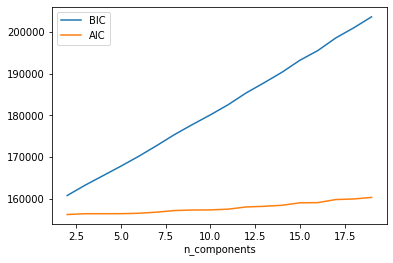

In [22]:
n_components = np.arange(2, 20)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(df_confd)
          for n in n_components]

plt.plot(n_components, [m.bic(df_confd) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_confd) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [41]:
bics, bics_err = get_bic_scores(min_clusters, max_clusters, df_confd)

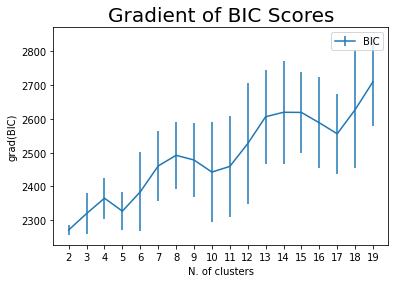

In [42]:
plot_bic_gradient(bics, bics_err, min_clusters, max_clusters)

In [140]:
bics

[68099.96031765896,
 68582.24569904295,
 69058.64528446952,
 69490.38663208854,
 69930.01345342014,
 70412.73759376392,
 70879.50803198421,
 71254.20635396968]

In [141]:
bics_err

[0.0,
 6.1376500972702015,
 4.129559984276202,
 32.52902555475048,
 27.230688808507818,
 22.347045858769942,
 32.266479119324316,
 55.11206583829535]

In [135]:
tt_results, tt_res_sigs = get_train_test_distance(min_clusters, max_clusters, df_confd)

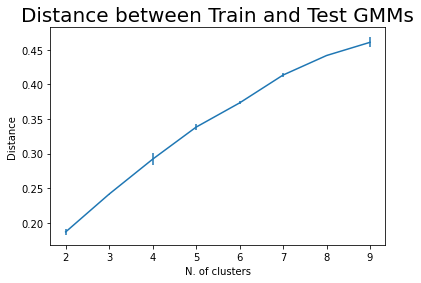

In [136]:
plot_train_test_distance(tt_results, tt_res_sigs, min_clusters, max_clusters)

In [137]:
sils, sils_err = get_silhouette_coefficient(min_clusters, max_clusters, df_confd)

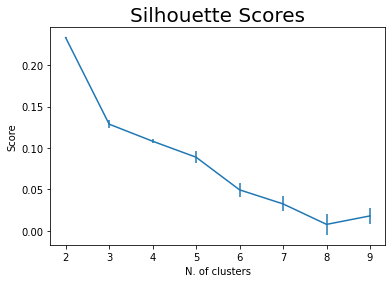

In [139]:
plot_silhouette_coefficient(sils, sils_err, min_clusters, max_clusters)

In [113]:
column_list = list(df2)
clustered_df = get_clustered_dataframe(df2, column_list, 2, 2000)

In [114]:
clustered_df

,smoking,blood_pressure,gene_3,gene_2,gene_1,bmi,age,serious_viral_illness,gene_4,gene_5,gene_6,gene_7
0,-0.893796,-0.573437,-2.207184,-0.344966,0.302944,-1.087053,0.656235,1.321112,-1.057376,-0.963232,-2.415388,0.363736
1,1.628964,-2.221658,-0.357635,-0.445873,0.645223,-0.649863,-1.677620,-3.146163,0.968273,1.329548,2.082275,0.049611
2,0.127227,0.036242,0.471470,0.247902,-0.558809,-1.258508,0.884981,-0.782272,-1.703845,-0.898981,-0.741481,0.606134
3,1.081085,2.433850,0.752081,0.100759,-1.833376,0.344762,1.367275,0.505519,0.155286,-1.898017,-2.777936,1.767560
4,-1.224027,1.662453,1.604708,0.166306,-0.250537,-0.224392,-0.626996,-0.515094,1.446884,0.572088,0.428187,0.691800
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.000103,-0.160020,0.496153,0.049052,0.560628,-0.717246,-0.011540,-0.022303,-0.332531,1.431596,1.590142,0.402458
1996,-0.054882,-0.854813,-0.674557,-0.397722,0.250389,-1.153798,0.789557,-1.289553,-0.530205,-0.366434,0.883564,-1.892646
1997,1.345841,-1.203810,0.465437,-0.251739,-0.318034,-0.712793,-0.749213,-1.928320,1.241811,-1.336729,0.142552,-0.475338
1998,0.258805,-0.347515,-0.252372,-0.209652,-0.766958,1.518216,0.008314,1.286668,-0.365767,-1.582929,-1.259038,-0.053128


In [115]:
analysis_results_clustered, summary_clustered = aitia.run_analysis(clustered_df, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.724397,8
1,FCI,False,0.724397,8
2,FGES-continuous,False,0.690306,9
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.724397,8


In [90]:
gmm = mixture.BayesianGaussianMixture(n_components=3).fit(df2)
clustered_data2 = gmm.sample(2000)
clustered_df2 = pd.DataFrame(clustered_data2[0], columns=list(df2))
analysis_results_clustered2, summary_clustered2 = aitia.run_analysis(clustered_df2, 
                                                target_graph_str=target_graph_str, 
                                                algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                ],
                                                pc=pc)
summary_clustered2

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.661460,10
1,FCI,False,0.661460,10
2,FGES-continuous,False,0.615306,12
3,GFCI-continuous,False,0.615306,12
4,RFCI-continuous,False,0.661460,10


In [91]:
gmm = mixture.BayesianGaussianMixture(n_components=4).fit(df2)
clustered_data3 = gmm.sample(2000)
clustered_df3 = pd.DataFrame(clustered_data3[0], columns=list(df2))
analysis_results_clustered3, summary_clustered3 = aitia.run_analysis(clustered_df3, 
                                                  target_graph_str=target_graph_str, 
                                                  algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI,
                                                   aitia.algo_runner.FGES_continuous,
                                                   aitia.algo_runner.GFCI_continuous,
                                                   aitia.algo_runner.RFCI_continuous,
                                                  ],
                                                  pc=pc)
summary_clustered3

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.690306,9
1,FCI,False,0.690306,9
2,FGES-continuous,False,0.636735,11
3,GFCI-continuous,False,0.690306,9
4,RFCI-continuous,False,0.690306,9


In [92]:
summary.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.922619
SHD                      2.400000
dtype: float64

In [93]:
summary_clustered.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.673823
SHD                      9.600000
dtype: float64

In [94]:
summary_clustered2.mean(axis=0)

Isomorphic to Target?     0.000000
AURC                      0.642998
SHD                      10.800000
dtype: float64

In [95]:
summary_clustered3.mean(axis=0)

Isomorphic to Target?    0.000000
AURC                     0.679592
SHD                      9.400000
dtype: float64